In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.preprocessing as skpp

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/refs/heads/master/dados/mtcars.csv')

<Axes: xlabel='wt', ylabel='mpg'>

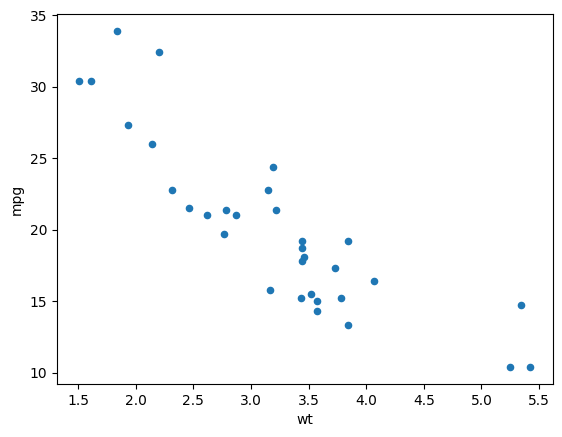

In [ ]:
# plot de distribuição de wt x mpg
df.plot.scatter(x="wt", y="mpg")

In [ ]:
df[["wt", "mpg"]].corr()

,wt,mpg
wt,1.000000,-0.867659
mpg,-0.867659,1.000000


In [ ]:
df["wt_log"] = np.log(df["wt"])

<Axes: xlabel='wt_log', ylabel='mpg'>

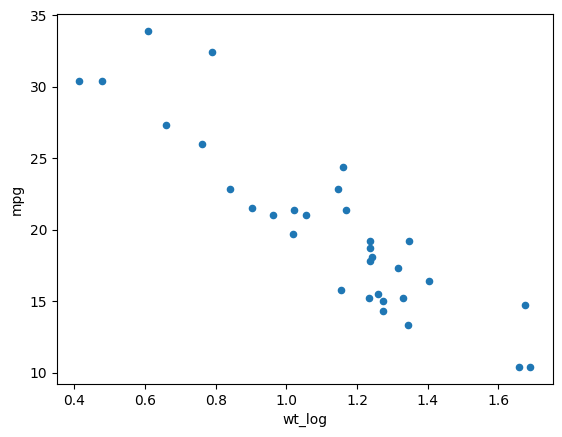

In [ ]:
df.plot.scatter(x="wt_log", y="mpg")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[["wt"]], df[["mpg"]], test_size=0.25, random_state=1)
print(x_train.shape)
print(x_test.shape)

(24, 1)
(8, 1)


In [ ]:
# Transformação Polinomial
x_poly_train, x_poly_test = skpp.PolynomialFeatures(degree=2).fit_transform(x_train), skpp.PolynomialFeatures(degree=2).fit_transform(x_test)
model_poly = LinearRegression()
model_poly.fit(x_poly_train, y_train)
# R2
model_poly.score(x_poly_test, y_test)

# Regressão Linear
model = LinearRegression()
model.fit(x_train, y_train)
# R2
model.score(x_test, y_test)

0.705474164043128

In [ ]:
y_prev = model.predict(x_test)
y_poly_prev = model_poly.predict(x_poly_test)
print(mean_squared_error(y_test, y_prev))
print(mean_squared_error(y_test, y_poly_prev))

16.638500787793586
10.391213674791437


<Axes: xlabel='wt', ylabel='mpg'>

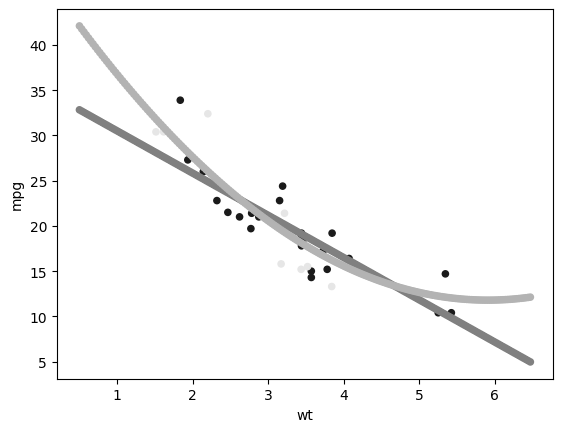

In [ ]:
dfp = x_train.copy()
dfp["mpg"] = y_train
dfp["sample"] = "0.1" # cor diferente

dft = x_test.copy()
dft["mpg"] = y_test
dft["sample"] = "0.9"

# geração dos dados da curva do modelo
x_fit = np.arange(0.5, 6.5, 0.03)
dff = pd.DataFrame({"wt": x_fit})
x_fit = dff
y_fit = model.predict(x_fit)
dff["mpg"] = y_fit
dff["sample"] = "0.5"


# polinomial
x_fit = np.arange(0.5, 6.5, 0.03)
dffp = pd.DataFrame({"wt": x_fit})
x_fit = skpp.PolynomialFeatures(degree=2).fit_transform(dffp)
y_fit = model_poly.predict(x_fit)
dffp["mpg"] = y_fit
dffp["sample"] = "0.7"

dfu = pd.concat([dfp, dft, dff, dffp])
dfu.plot.scatter(x="wt", y="mpg", c="sample")

In [ ]:
dfu

,wt,mpg,sample
19,1.835,33.900000,0.1
14,5.250,10.400000,0.1
24,3.845,19.200000,0.1
10,3.440,17.800000,0.1
20,2.465,21.500000,0.1
...,...,...,...
195,6.350,11.999781,0.7
196,6.380,12.028391,0.7
197,6.410,12.058869,0.7
198,6.440,12.091214,0.7
